<a href="https://colab.research.google.com/github/VictorPabloCristina/DataSet-Proyecto-F-CH/blob/main/codigo_puro_proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
#lectura y análisis
import numpy as np
import pandas as pd
import scipy
import missingno as msno


#Machine Learning
import sklearn # Paquete base de ML

#adicionales
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix



#escaladores
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/VictorPabloCristina/DataSet-Proyecto-F-CH/main/FIFA22_official_data.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print=(df.shape)
df.head(3)

#Fuente: https://opennetzero.org/dataset/fifa-world-cup-qatar-2022}


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0


In [3]:
#Reasiganmos indice
df.index = df['ID']
df= df.drop('ID', axis = 'columns')
df.head(3)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0


In [4]:
#Conocemos el formato de cantidad de filas y columnas de nuestro DF
df.shape

(16710, 64)

In [5]:
#Conocemos las variables de nuestro DF
df.columns.values

array(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position',
       'Best Overall Rating', 'Release Clause', 'DefensiveAwareness'],
      dtype=object)

In [6]:
#Conocemos los tipos de datos que tenemos para ver si debemos transformar alguno de ellos
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 212198 to 178453
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16710 non-null  object 
 1   Age                       16710 non-null  int64  
 2   Photo                     16710 non-null  object 
 3   Nationality               16710 non-null  object 
 4   Flag                      16710 non-null  object 
 5   Overall                   16710 non-null  int64  
 6   Potential                 16710 non-null  int64  
 7   Club                      16446 non-null  object 
 8   Club Logo                 16710 non-null  object 
 9   Value                     16710 non-null  object 
 10  Wage                      16710 non-null  object 
 11  Special                   16710 non-null  int64  
 12  Preferred Foot            16710 non-null  object 
 13  International Reputation  16710 non-null  float64
 14  

In [7]:
#transformamos dos variables que vamos a utilizar y son de nuestro interes y las pasamos de object
#para poder trabajarlas
import pandas as pd
import re
df['Value'] = df['Value'].apply(lambda x: re.sub("[^0-9]"," ", x))
df['Value'] = pd.to_numeric(df['Value'], errors='coerce').astype(float)


df['Wage'] = df['Wage'].apply(lambda x: re.sub("[^0-9]"," ", x))
df['Wage'] = pd.to_numeric(df['Wage'], errors='coerce').astype(float)


df.info(verbose=True, show_counts=True)
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16710 entries, 212198 to 178453
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      16710 non-null  object 
 1   Age                       16710 non-null  int64  
 2   Photo                     16710 non-null  object 
 3   Nationality               16710 non-null  object 
 4   Flag                      16710 non-null  object 
 5   Overall                   16710 non-null  int64  
 6   Potential                 16710 non-null  int64  
 7   Club                      16446 non-null  object 
 8   Club Logo                 16710 non-null  object 
 9   Value                     8771 non-null   float64
 10  Wage                      16710 non-null  float64
 11  Special                   16710 non-null  int64  
 12  Preferred Foot            16710 non-null  object 
 13  International Reputation  16710 non-null  float64
 14  

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,NaN,250.0,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,93.0,140.0,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,NaN,135.0,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0


In [8]:
#Eliminamos las columnas NaN
df= df.drop('Marking', axis = 'columns')
df= df.drop('Loaned From', axis = 'columns')

<Axes: >

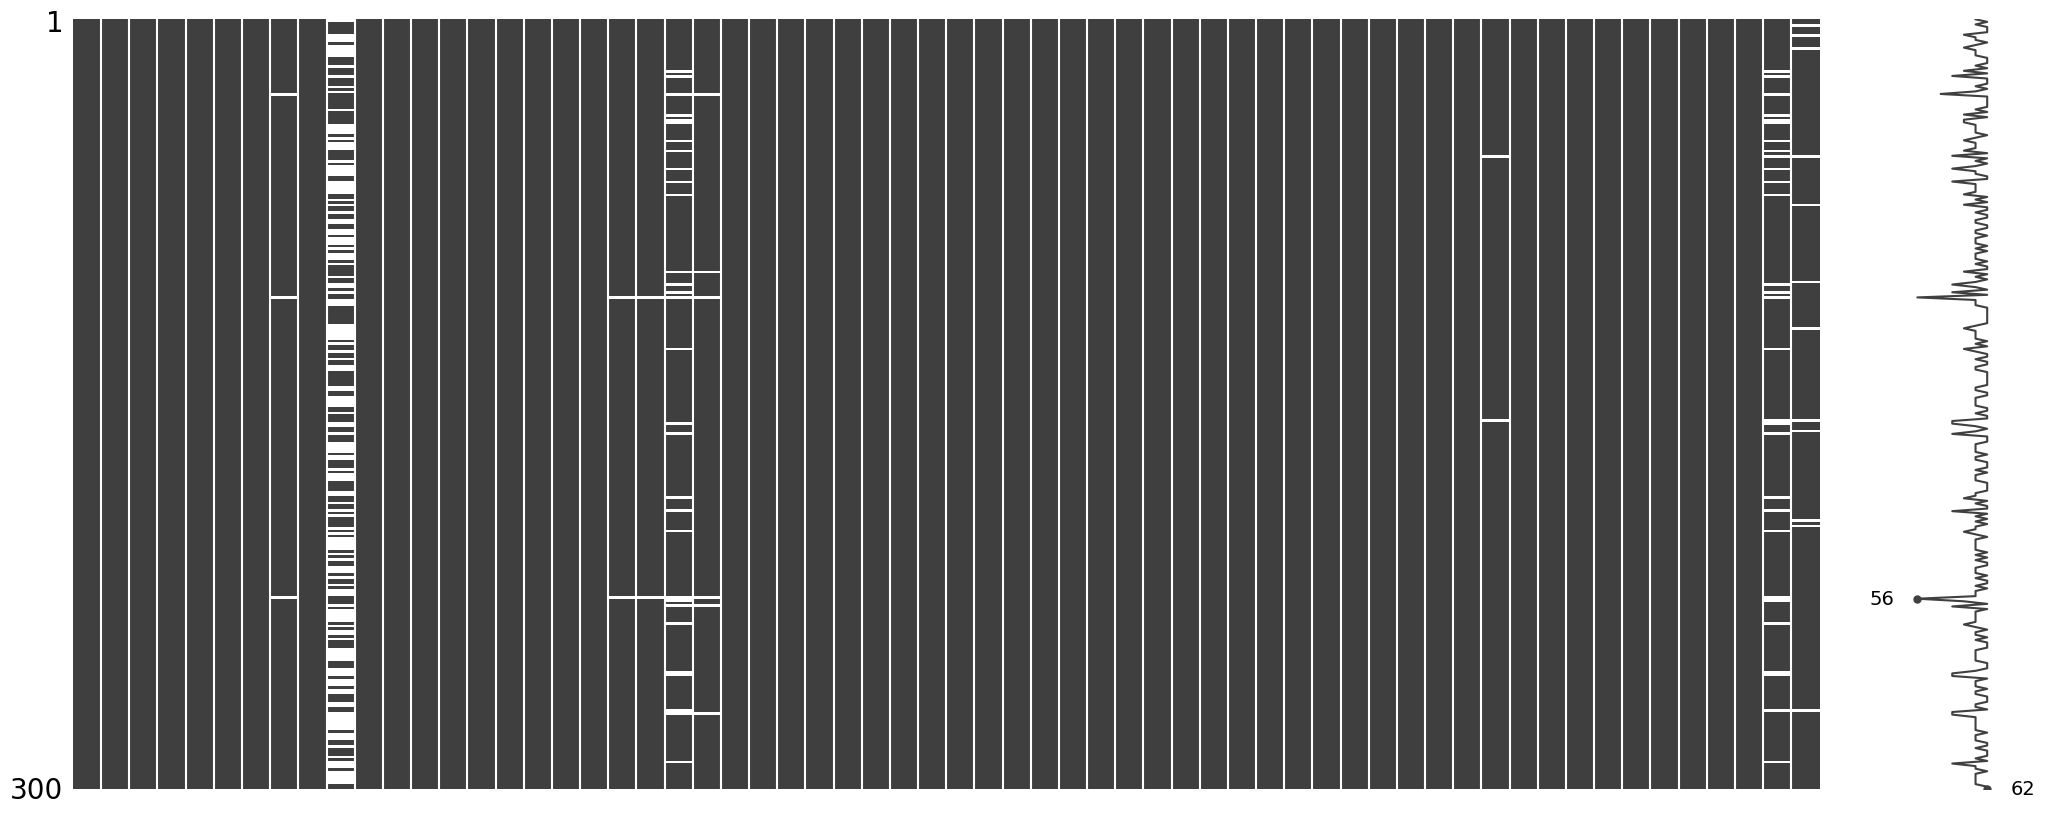

In [9]:
#Buscamos e identificamos Hucos en nuestro DF
msno.matrix(df.sample(300))

In [10]:
#Buscamos lineas duplicadas
df.duplicated()

ID
212198    False
209658    False
176580    False
192985    False
224334    False
          ...  
240558    False
262846    False
241317    False
259646    False
178453    False
Length: 16710, dtype: bool

In [11]:
#Buscamos datos Nulos
df.isnull()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
212198,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
209658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176580,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
192985,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
224334,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
262846,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
241317,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [12]:
#reemplazamos los Nulos por Cero (o)
df.fillna(0)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,0.0,250.0,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,93.0,140.0,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,0.0,135.0,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,0.0,350.0,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",2025,181cm,70kg,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,37.0,45.0,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",2024,172cm,69kg,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,100.0,1.0,782,Right,1.0,2.0,1.0,Medium/ Medium,Normal (185+),No,"<span class=""pos pos29"">RES",31.0,"Jul 1, 2016",2019,188cm,80kg,12.0,5.0,13.0,18.0,7.0,12.0,11.0,13.0,19.0,10.0,15.0,21.0,34.0,30.0,31.0,16.0,51.0,26.0,57.0,6.0,16.0,9.0,5.0,29.0,18.0,37.0,11.0,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,€238K,0.0
262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.c

In [13]:
#Utilizamos las funcion Describe para conocer algunos datos Estadisticos del DF que estamos trabajando
df.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,16710.000000,16710.000000,16710.000000,8771.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16684.000000,16710.000000,16710.000000,16710.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16702.000000,16702.000000,16673.000000,16710.000000,16459.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,15818.000000
mean,25.727409,67.646320,72.572292,402.699350,90.102095,1652.497307,1.169958,3.008199,2.475464,20.458643,52.212448,48.725075,54.123339,61.314423,45.652972,58.591203,50.574522,45.074087,55.454877,61.387433,65.684919,65.783124,65.222875,63.592400,64.943262,60.642190,65.896659,64.204548,66.266008,49.989228,57.955536,48.057418,53.150461,56.378936,50.615919,61.001883,49.155536,46.830564,15.683662,15.521364,15.457989,15.581927,15.789228,68.565410,48.019408
std,5.048910,6.457695,5.688085,315.990247,212.361038,257.271696,0.485305,0.681742,0.791414,17.699813,17.772348,19.401715,17.007831,13.665353,17.828225,17.925005,18.237536,17.596471,14.494716,15.673348,15.005583,14.737924,14.512499,8.594003,14.257323,12.959795,12.285499,15.575110,12.624115,19.082943,16.855790,20.846484,19.204880,13.415572,15.756832,11.399833,21.454857,21.175431,17.009757,16.302298,16.099993,16.584045,17.318251,6.256253,20.181354
min,16.000000,28.000000,38.000000,0.000000,0.000000,571.000000,1.000000,1.000000,1.000000,1.000000,7.000000,3.000000,5.000000,8.000000,4.000000,5.000000,6.000000,4.000000,9.000000,8.000000,13.000000,15.000000,18.000000,28.000000,19.000000,12.000000,22.000000,13.000000,18.000000,4.000000,11.000000,4.000000,3.000000,10.000000,7.000000,12.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,3.000000
25%,22.000000,63.000000,69.000000,30.000000,3.000000,1525.000000,1.000000,3.000000,2.000000,8.000000,42.000000,34.000000,46.000000,57.000000,33.000000,54.000000,39.000000,33.000000,47.000000,58.000000,58.000000,59.000000,57.000000,58.000000,57.000000,52.000000,59.000000,57.000000,59.000000,37.000000,47.000000,28.000000,44.000000,48.000000,41.000000,55.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,65.000000,30.000000
50%,25.000000,68.000000,72.000000,400.000000,7.000000,1687.000000,1.000000,3.000000,2.000000,17.000000,57.000000,53.000000,57.000000,64.000000,48.000000,63.500000,53.000000,44.000000,58.000000,65.000000,68.000000,68.000000,68.000000,64.000000,67.000000,62.000000,67.000000,67.000000,68.000000,55.000000,61.000000,55.000000,58.000000,58.000000,52.000000,62.000000,57.000000,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,54.000000
75%,29.000000,72.000000,76.000000,675.000000,24.000000,1826.000000,1.000000,3.000000,3.000000,27.000000,65.000000,64.000000,66.000000,70.000000,59.000000,70.000000,64.000000,59.000000,66.000000,71.000000,76.000000,76.000000,75.000000,69.000000,75.000000,70.000000,74.000000,75.000000,75.000000,65.000000,71.000000,65.000000,67.000000,66.000000,62.000000,69.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,73.000000,65.000000
max,54.000000,93.000000,95.000000,975.000000,950.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,94.000000,95.000000,93.000000,94.000000,90.000000,96.000000,94.000000,94.000000,93.000000,96.000000,97.000000,97.000000,96.00000

Text(0, 0.5, 'Jugador')

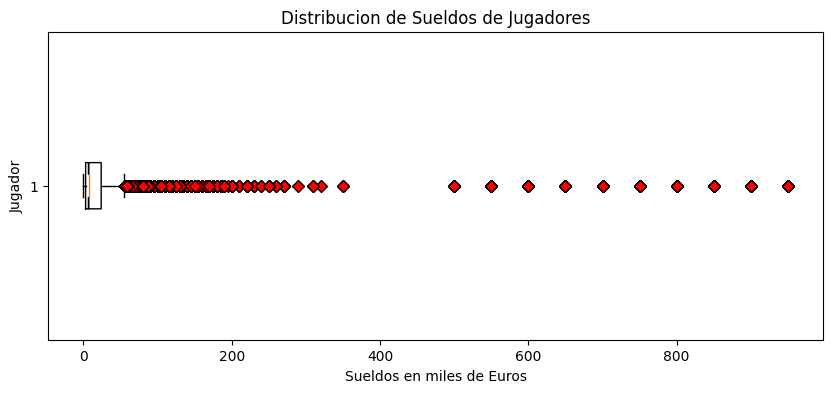

In [14]:
#Graficamos un Box, buscamos identificar el Sueldo medio de los jugadores del Dataset
green_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots(figsize=(10,4))
ax.boxplot(df['Wage'],vert=False,notch=True,flierprops=green_diamond)
ax.set_title('Distribucion de Sueldos de Jugadores')
ax.set_xlabel('Sueldos en miles de Euros')
ax.set_ylabel("Jugador")

In [15]:
#Definimos una nueva Variable para analizar los sueldos mayores al promedio
df_90k = df[df['Wage']>=90]

In [16]:
#Conocemos los datos estadisticos de nuestra nueva Variable
df_90k.describe()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,2311.000000,2311.000000,2311.000000,1710.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.00000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2304.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2283.000000
mean,22.856339,63.386846,72.505409,397.166082,583.431415,1525.205971,1.186499,2.911294,2.273475,24.178711,45.979230,43.438338,48.729122,55.81177,39.895716,52.952402,44.302899,40.012116,49.747728,55.588490,64.254868,64.143661,62.460407,58.579836,63.975335,54.463436,62.945478,59.443098,61.686716,43.156642,51.675465,42.936824,47.292081,51.334920,45.996106,54.729601,44.883600,42.995240,16.860234,16.594115,16.531804,16.583730,16.959325,64.548248,42.939553
std,5.437815,8.813414,6.929755,256.499313,205.851561,300.764067,0.622319,0.702751,0.783809,19.038184,18.589144,20.465756,17.700691,15.89518,18.277063,19.954220,18.739730,17.540006,16.154100,18.057096,16.085471,15.741064,15.237260,11.274824,14.863005,13.982219,11.981969,16.716405,13.224717,20.086623,17.107334,20.983758,20.601684,14.694475,16.463142,13.938681,21.419735,20.774911,17.932508,17.150382,16.952766,17.107447,18.166714,8.559250,20.365758
min,16.000000,47.000000,49.000000,0.000000,90.000000,754.000000,1.000000,1.000000,1.000000,1.000000,7.000000,3.000000,8.000000,11.00000,4.000000,5.000000,8.000000,5.000000,9.000000,10.000000,15.000000,15.000000,19.000000,28.000000,20.000000,20.000000,22.000000,15.000000,23.000000,4.000000,11.000000,4.000000,3.000000,13.000000,7.000000,17.000000,7.000000,8.000000,2.000000,2.000000,2.000000,2.000000,3.000000,47.000000,3.000000
25%,18.000000,58.000000,68.000000,200.000000,500.000000,1376.500000,1.000000,2.000000,2.000000,11.000000,34.000000,27.000000,41.000000,49.00000,28.000000,46.000000,32.000000,29.000000,39.000000,50.000000,58.000000,59.000000,54.000000,51.000000,55.000000,44.000000,56.000000,52.000000,53.000000,28.000000,40.000000,23.000000,34.000000,41.000000,37.000000,46.000000,24.000000,23.000000,8.000000,8.000000,8.000000,8.000000,8.000000,59.000000,25.000000
50%,21.000000,62.000000,72.000000,375.000000,500.000000,1526.000000,1.000000,3.000000,2.000000,21.000000,48.000000,46.000000,51.000000,58.00000,40.000000,58.000000,45.000000,38.000000,51.000000,59.000000,68.000000,67.000000,65.000000,57.000000,65.000000,54.000000,63.000000,62.000000,63.000000,45.000000,53.000000,48.000000,52.000000,52.000000,47.000000,54.000000,51.000000,48.000000,11.000000,11.000000,11.000000,11.000000,11.000000,63.000000,46.000000
75%,26.000000,68.000000,76.000000,575.000000,750.000000,1691.000000,1.000000,3.000000,3.000000,31.000000,59.000000,59.000000,60.000000,65.00000,52.000000,65.000000,57.000000,51.000000,61.000000,66.000000,75.000000,74.000000,73.000000,65.000000,75.000000,64.000000,71.000000,71.000000,72.000000,58.000000,64.000000,59.000000,61.000000,60.500000,58.000000,63.000000,62.000000,60.000000,14.000000,14.000000,14.000000,14.000000,14.000000,69.000000,59.000000
max,54.000000,93.000000,95.000000,975.000000,950.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,94.000000,95.000000,92.000000,94.00000,90.000000,96.000000,93.000000,94.000000,93.000000,96.000000,97.000000,97.000000,96.000000,94.000000,95.000000,94.000000,95.00000

Text(0.5, 0, 'Sueldos en miles de Euros')

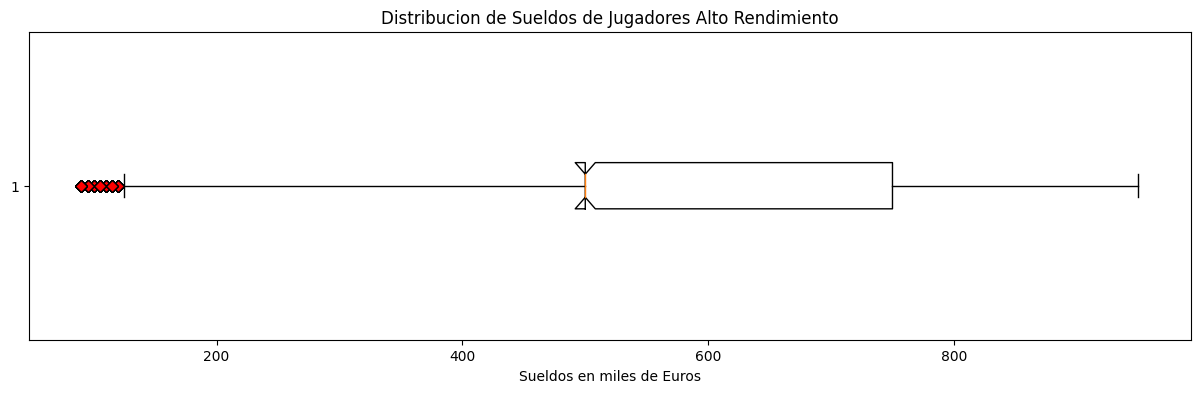

In [17]:
#Graficamos nuevamente un Box, pero esta vez condicionado a la nueva Variable
#donde los salarios son mayores a 90K
green_diamond = dict(markerfacecolor='r', marker='D')
fig, ax = plt.subplots(figsize=(15,4))
ax.boxplot(df_90k['Wage'],vert=False,notch=True,flierprops=green_diamond)
ax.set_title('Distribucion de Sueldos de Jugadores Alto Rendimiento')
ax.set_xlabel('Sueldos en miles de Euros')

Text(0, 0.5, 'Cantidad de Jugadores')

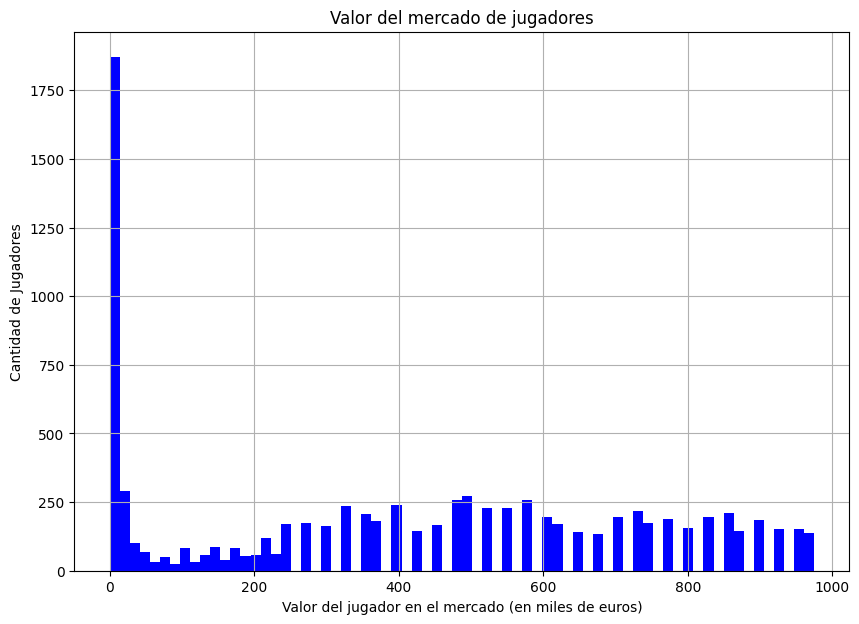

In [18]:
#En esta ocacion, utilizaremos un Histograma para verificar la Valoracion de los jugadores en el mercado
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(df['Value'], bins=70, facecolor='b')
ax.grid(True)
ax.set_title('Valor del mercado de jugadores')
ax.set_xlabel('Valor del jugador en el mercado (en miles de euros)')
ax.set_ylabel("Cantidad de Jugadores")

Text(0.5, 1.0, 'Valoracion del Mercado Vs Sueldo del jugador')

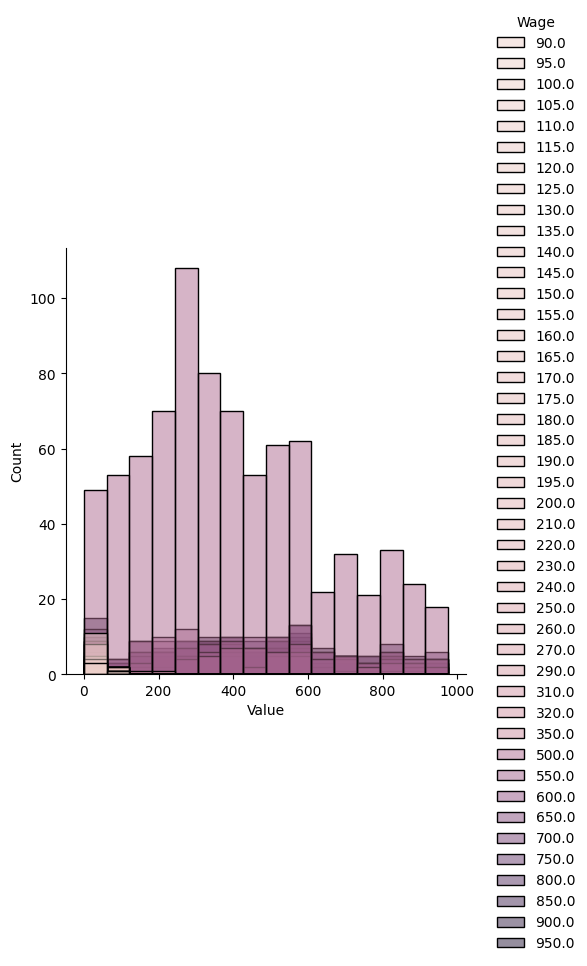

In [19]:
#Relacion entre Valoracion de Jugadores de alto rendimiento en el mercado y Sus Sueldos

sns.displot(data=df_90k, x="Value", hue="Wage", alpha=0.5)
ax.set_title("Valoracion del Mercado Vs Sueldo del jugador")


Text(0.5, 0, 'Potencial')

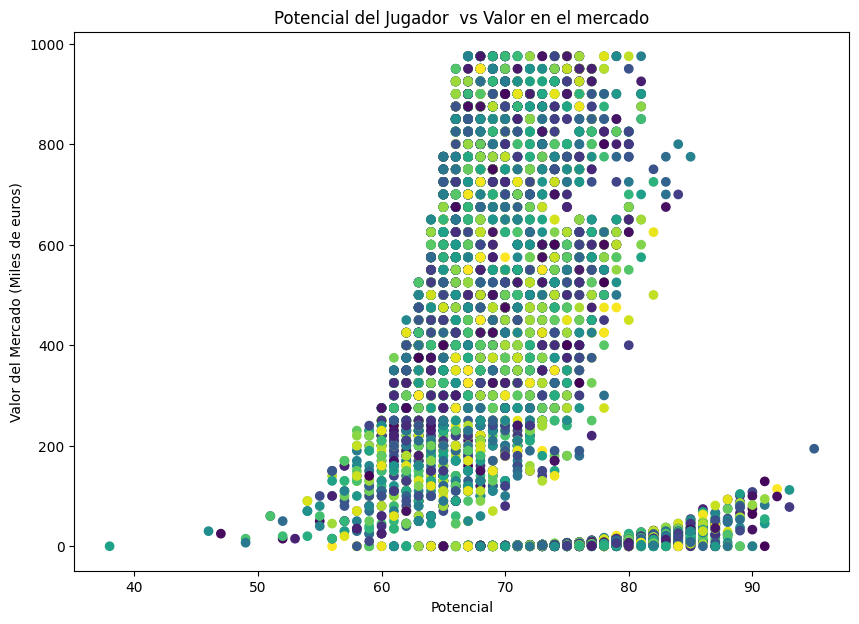

In [20]:
#En esta oportunidad realizaremos un Scatter para hacer un analicis Bivariado,
#entre las dos variables mas significativas del mercado
np.random
fig, ax = plt.subplots(figsize=(10,7))
colors = np.random.rand(df['Potential'].size)
ax.scatter(df['Potential'], df['Value'], c=colors)
ax.set_title('Potencial del Jugador  vs Valor en el mercado')
ax.set_ylabel('Valor del Mercado (Miles de euros)')
ax.set_xlabel('Potencial')

In [21]:
#Utilizamos la Funcion Groupby para conocer cuantos jugadores de cada pais estan inscriptos en FIFA
df.groupby('Nationality').size()
nacion_agrupados = df.groupby('Nationality').size()
nacion_agrupados = nacion_agrupados.sort_values(ascending=False)
nacion_agrupados.head(12)

Nationality
England                1845
Spain                  1151
Germany                1120
France                  987
Argentina               846
Brazil                  819
Italy                   514
Netherlands             443
Portugal                354
United States           341
Mexico                  312
Republic of Ireland     308
dtype: int64

(-1.0, 20.0)

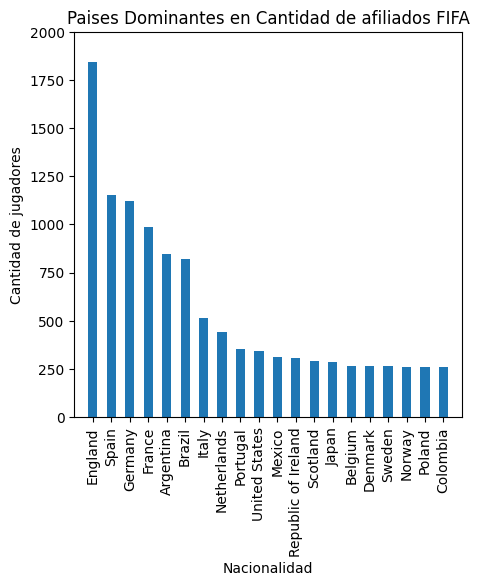

In [22]:
#Graficamos la info del paso anterior
plt.figure(figsize=(5,5))
plt.subplot()
nacion_agrupados.nlargest(20).plot.bar()
plt.title("Paises Dominantes en Cantidad de afiliados FIFA")
plt.xlabel("Nacionalidad")
plt.ylabel("Cantidad de jugadores")
plt.ylim(0,2000)
plt.xlim(-1,20)

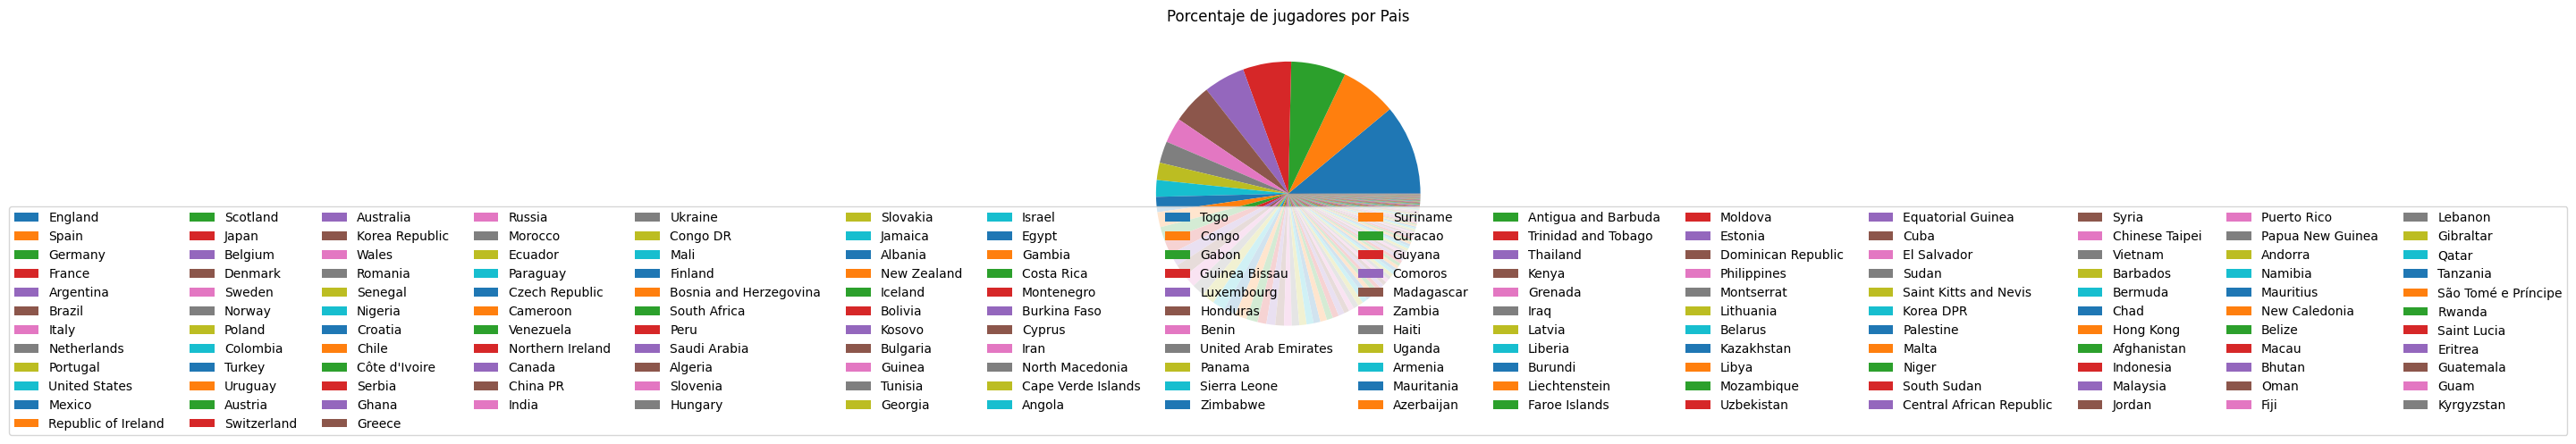

In [23]:
#Graficamos en un PIE para conocer emn Porcentaje cuales son los paices dominantes en cantidad de jugadores
plt.pie(nacion_agrupados, autopct='', textprops={'fontsize': 15})
plt.title("Porcentaje de jugadores por Pais")
plt.legend(labels=nacion_agrupados.index, loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=15)
plt.show()

In [24]:
#Definimos un nuevo DF para trabajar con los jugadores mas Valorados del mercado
df_paisesstars = df[df['Value']>90].groupby('Nationality').size().reset_index(name='counts')
df_paisesstars.sort_values(ascending=False, inplace=True, by='counts')
df_paisesstars.head(10)

,Nationality,counts
48,England,1120
58,Germany,516
54,France,323
138,Spain,249
124,Republic of Ireland,216
6,Argentina,186
130,Scotland,183
152,United States,182
78,Italy,154
107,Netherlands,141


Text(0.5, 0, 'Numero de jugadores')

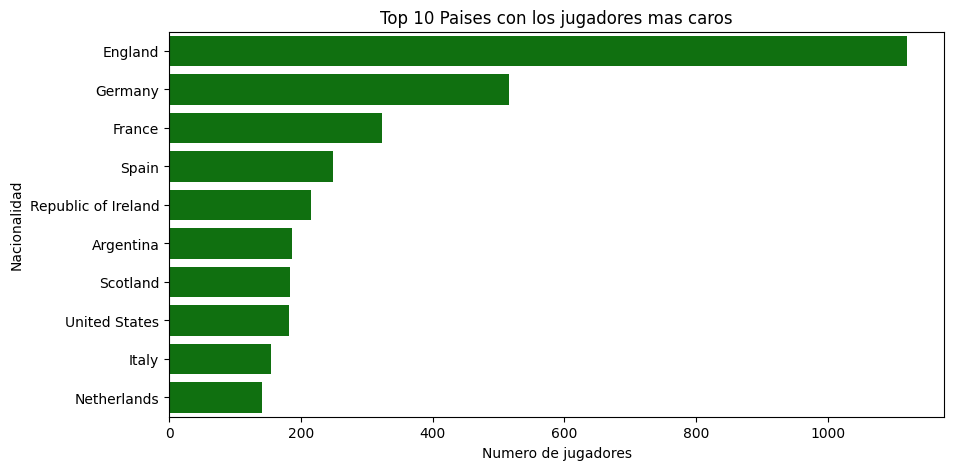

In [25]:
#Realizamos un grafico de barras para ver que pais es dominante en jugadores mas Costosos
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Top 10 Paises con los jugadores mas caros')
sns.barplot(data=df_paisesstars.head(10), y='Nationality', x='counts',orient='h',color="g")
ax.set_ylabel('Nacionalidad')
ax.set_xlabel('Numero de jugadores')

In [26]:
#Posicion de Juego de mayor Valoracion en el mercado

df_posiciones = df[df['Value']>90].groupby('Best Position').size().reset_index(name='counts')
df_posiciones.sort_values(ascending=False, inplace=True, by='counts')
df_posiciones.head()

,Best Position,counts
1,CB,1336
14,ST,999
5,GK,760
0,CAM,754
11,RM,490


Text(0, 0.5, 'Numero de jugadores')

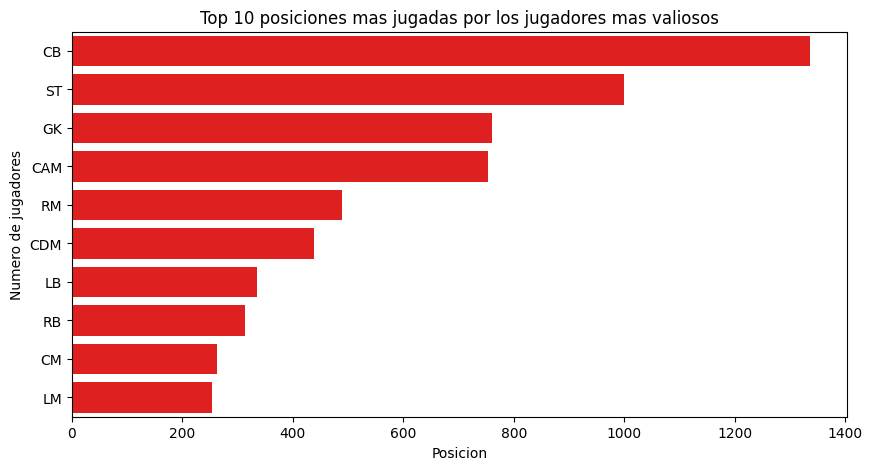

In [27]:
#En esta ocacion, realizaremos un Bar plot para verificar cuales son las posiciones de juego
#dentro del campo que predominan en el mercado
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Top 10 posiciones mas jugadas por los jugadores mas valiosos')
sns.barplot(data=df_posiciones.head(10), x='counts', y='Best Position', color="r")
ax.set_xlabel('Posicion')
ax.set_ylabel('Numero de jugadores')

Modelo a entrenar

In [28]:
#Selleccionamos cuales columnas trabajaremos para verificar las habilidades entre los distintos jugadores

df_modelo=df[["Preferred Foot",'Volleys',"Overall",'Potential','BallControl',"ShotPower"]]
df_modelo.head(5)

,Preferred Foot,Volleys,Overall,Potential,BallControl,ShotPower
ID,,,,,,
212198,Right,87.0,88,89,87.0,89.0
209658,Right,69.0,87,88,87.0,85.0
176580,Right,90.0,88,88,86.0,89.0
192985,Right,82.0,91,91,91.0,91.0
224334,Left,68.0,84,84,88.0,82.0


In [29]:
class_counts = df_modelo['Volleys'].value_counts()
class_counts.head(5)

59.0    419
55.0    400
48.0    389
58.0    373
52.0    366
Name: Volleys, dtype: int64

In [30]:
min_count = class_counts.min()
min_count

1

In [31]:
balanced_data= df_modelo.groupby('Volleys').apply(lambda x: x.sample(min_count))

balanced_data.head(5)

,,Preferred Foot,Volleys,Overall,Potential,BallControl,ShotPower
Volleys,ID,,,,,,
4.0,182224,Right,4.0,71,71,22.0,53.0
5.0,264057,Right,5.0,51,74,15.0,39.0
6.0,259362,Right,6.0,57,70,14.0,47.0
7.0,254562,Right,7.0,50,70,18.0,38.0
8.0,222024,Right,8.0,65,67,20.0,43.0


In [32]:
balanced_data = balanced_data.reset_index(drop=True)
balanced_data.head(5)

,Preferred Foot,Volleys,Overall,Potential,BallControl,ShotPower
0,Right,4.0,71,71,22.0,53.0
1,Right,5.0,51,74,15.0,39.0
2,Right,6.0,57,70,14.0,47.0
3,Right,7.0,50,70,18.0,38.0
4,Right,8.0,65,67,20.0,43.0


Text(0.5, 1.0, 'Potencia de disparo vs. Control de balon')

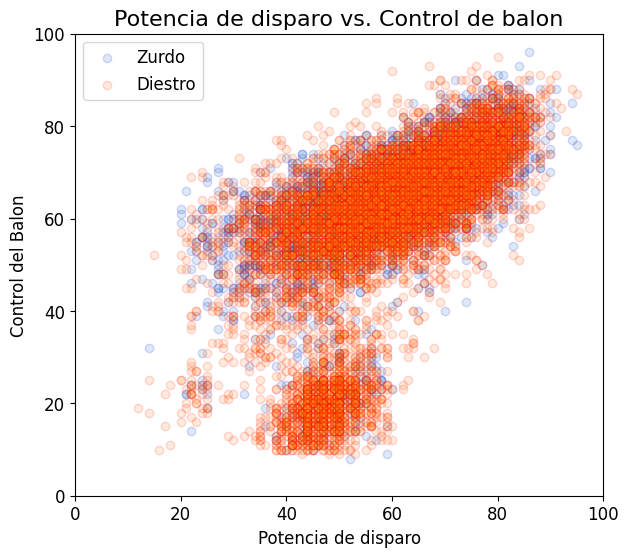

In [33]:
# Extraemos algunas columnas de interes
balanced_data = df[["Preferred Foot",  "ShotPower",'BallControl']]
# Filtramos por pierna mas habil en el nuevo DS
df_Z =  balanced_data[ balanced_data['Preferred Foot'] == 'Left']

df_D =  balanced_data[ balanced_data['Preferred Foot'] == 'Right']

plt.figure(figsize=(15,6))

# Control del balon VS Potencia de tiro - Para los Zurdos y Diestros
plt.subplot(121)
plt.scatter(df_Z['ShotPower'], df_Z['BallControl'], edgecolor='b', alpha=0.15, label='Zurdo')
plt.scatter(df_D['ShotPower'], df_D['BallControl'], edgecolor='r', alpha=0.15, label='Diestro')
plt.legend(loc='best', fontsize=12)
plt.xlim(0, 100)
plt.xlabel('Potencia de disparo', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Control del Balon', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Potencia de disparo vs. Control de balon', fontsize=16)

In [34]:
#Primero debemos crear una nueva Columna para pasar el "Preferred Foot" de STR a INT para que el modelo lo tome

balanced_data = df[["Preferred Foot",  "ShotPower",'BallControl']]
balanced_data['Pie'] = df['Preferred Foot'].map(lambda x: 1 if x == 'Left' else 2)
balanced_data.head(10)

<ipython-input-34-c91684aeaebd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_data['Pie'] = df['Preferred Foot'].map(lambda x: 1 if x == 'Left' else 2)


,Preferred Foot,ShotPower,BallControl,Pie
ID,,,,
212198,Right,89.0,87.0,2
209658,Right,85.0,87.0,2
176580,Right,89.0,86.0,2
192985,Right,91.0,91.0,2
224334,Left,82.0,88.0,1
212622,Right,78.0,85.0,2
187961,Right,83.0,83.0,2
181291,Right,78.0,88.0,2
208333,Right,85.0,79.0,2


In [35]:
#Creamos una nueva Variable  df_modelo_ok con todos los datos INT (ahora el Diestro es 2 y el Zurdo es 1)

df_modelo_ok=balanced_data[["Pie", "ShotPower",'BallControl']]
df_modelo_ok.head(10)

,Pie,ShotPower,BallControl
ID,,,
212198,2,89.0,87.0
209658,2,85.0,87.0
176580,2,89.0,86.0
192985,2,91.0,91.0
224334,1,82.0,88.0
212622,2,78.0,85.0
187961,2,83.0,83.0
181291,2,78.0,88.0
208333,2,85.0,79.0


In [36]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [37]:
X = np.array(balanced_data["BallControl"])
y = np.array(balanced_data["ShotPower"])

reg = LinearRegression().fit(X.reshape(-1, 1),y)

nuevos_datos = np.array(balanced_data["BallControl"])
predicciones = reg.predict(nuevos_datos.reshape(-1, 1))
nuevos_datosy = np.array(balanced_data["ShotPower"])
prediccionesy = reg.predict(nuevos_datosy.reshape(-1, 1))

predicciones

array([73.80128898, 73.80128898, 73.28751391, ..., 35.26815842,
       35.78193349, 46.57121005])

In [38]:
prediccionesy

array([74.82883913, 72.77373883, 74.82883913, ..., 46.57121005,
       44.00233468, 49.14008542])

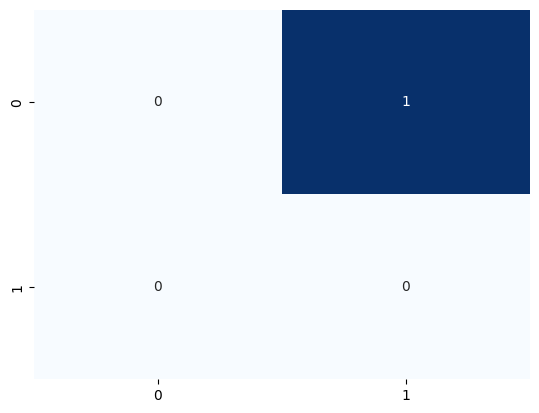

In [39]:
predicciones=np.array(["BallControl"])
prediccionesy=np.array(["ShotPower"])

cm= confusion_matrix(predicciones,prediccionesy)
labels=["clase 0", "Clase1"]

fig, ax=plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
plt.show()

In [40]:
k = 3 # Definir los grupos
kmeans = KMeans(n_clusters=k, init='k-means++')
#fit entrena el modelo
kmeans.fit(df_modelo_ok)
#predict asigna los clusters
labels = kmeans.predict(df_modelo_ok)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
centroids

array([[ 1.86973834, 45.84527873, 22.54948805],
       [ 1.74339581, 70.15543133, 70.18151924],
       [ 1.73803397, 50.21564591, 59.33710757]])

In [42]:
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [43]:
sum_sq_d = []
K = range(1,14)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_modelo_ok[["ShotPower",'BallControl']])
    sum_sq_d.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

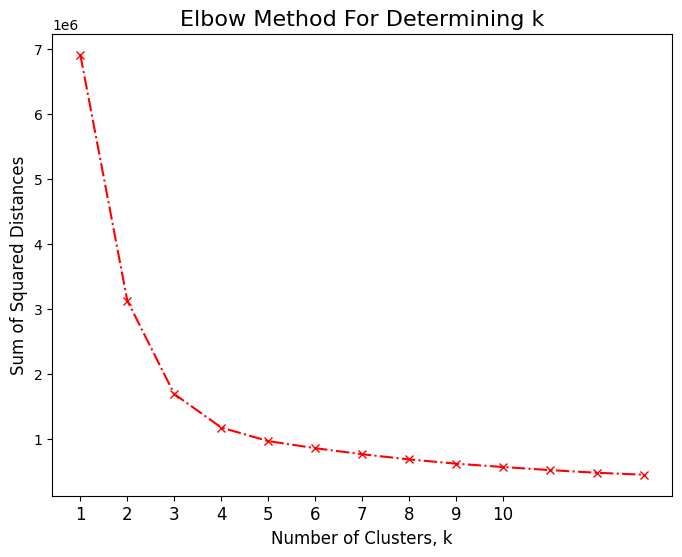

In [44]:
#Metodo del Codo para verificar el numero de Clusters

plt.figure(figsize=(8,6))
plt.plot(K, sum_sq_d, 'rx-.')
plt.xlabel('Number of Clusters, k', fontsize=12)
plt.xticks(range(1,11), fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.xticks(fontsize=12)
plt.title('Elbow Method For Determining k', fontsize=16)
plt.show()

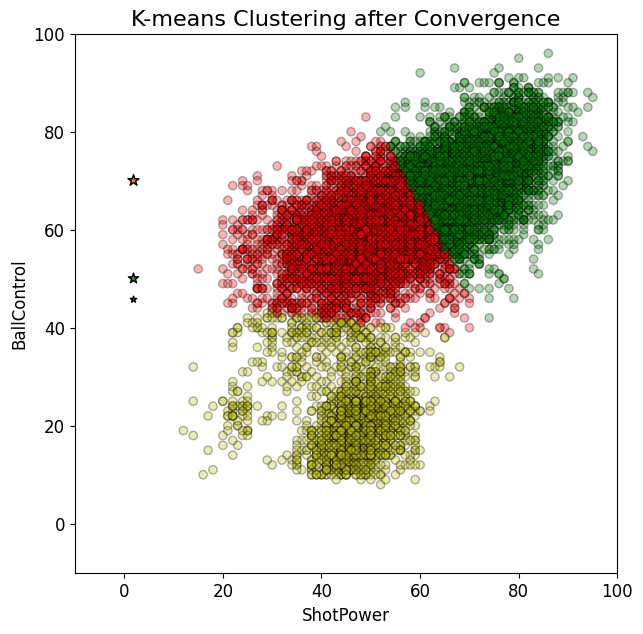

In [45]:
#Graficamos el modelo

plt.figure(figsize=(7,7))
color_map = {1:'y', 2:'g', 3:'r'}

#colores según el cluster al que pertenezcas
colors = [color_map[x+1] for x in labels]

plt.scatter(df_modelo_ok['ShotPower'], df_modelo_ok['BallControl'], color=colors, alpha=0.3, edgecolor='k')


for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, marker='*', edgecolor='k')
plt.xlim(-10,100)
plt.xlabel('ShotPower', fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(-10,100)
plt.ylabel('BallControl', fontsize=12)
plt.yticks(fontsize=12)
plt.title('K-means Clustering after Convergence', fontsize=16)
plt.show()